<a href="https://colab.research.google.com/github/julialewandowska/Group1_CV_notebooks/blob/main/Testing_trained_model_rearanged_Roboflow_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install YOLOv7
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# clone YOLOv7 repository
%cd {HOME}
!git clone https://github.com/WongKinYiu/yolov7

# navigate to yolov7 directory and checkout u7 branch of YOLOv7 - this is hash of lates commit from u7 branch as of 12/21/2022
%cd {HOME}/yolov7
!git checkout 44f30af0daccb1a3baecc5d80eae22948516c579

/content
fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7
HEAD is now at 44f30af u7 readme


In [5]:
# install the requirements
%cd {HOME}/yolov7/seg
!pip install --upgrade pip
!pip install -r requirements.txt

/content/yolov7/seg


In [6]:
# download the pretrained model starting checkpoint to yolov7/seg directory
%cd {HOME}/yolov7/seg
!wget https://github.com/julialewandowska/crack_detection_model/raw/main/best.pt
WEIGHTS_PATH = f"{HOME}/yolov7/seg/best.pt"

/content/yolov7/seg
--2023-07-04 09:47:58--  https://github.com/julialewandowska/crack_detection_model/raw/main/best.pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/julialewandowska/crack_detection_model/main/best.pt [following]
--2023-07-04 09:47:58--  https://raw.githubusercontent.com/julialewandowska/crack_detection_model/main/best.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76285957 (73M) [application/octet-stream]
Saving to: ‘best.pt’

best.pt             100%[===================>]  72.75M   387MB/s    in 0.2s    

2023-07-04 09:47:59 (387 MB/s) - ‘best.pt’ saved [76285957/7628595

In [7]:
# download example image to yolov7/seg directory
!curl -L https://github.com/julialewandowska/crack_test_dataset/raw/main/crack_test_dataset.zip -v --output crack_test_dataset.zip
!unzip -o crack_test_dataset.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0*   Trying 140.82.113.4:443...
* TCP_NODELAY set
* Connected to github.com (140.82.113.4) port 443 (#0)
* ALPN, offering h2
* ALPN, offering http/1.1
* successfully set certificate verify locations:
*   CAfile: /etc/ssl/certs/ca-certificates.crt
  CApath: /etc/ssl/certs
} [5 bytes data]
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
} [512 bytes data]
* TLSv1.3 (IN), TLS handshake, Server hello (2):
{ [122 bytes data]
* TLSv1.3 (IN), TLS handshake, Encrypted Extensions (8):
{ [19 bytes data]
* TLSv1.3 (IN), TLS handshake, Certificate (11):
{ [2459 bytes data]
* TLSv1.3 (IN), TLS handshake, CERT verify (15):
{ [79 bytes data]
* TLSv1.3 (IN), TLS handshake, Finished (20):
{ [36 bytes data]
* TLSv1.3 (OUT), TLS change cipher, Change cipher spec (1):
} [1

In [9]:
%cd {HOME}/yolov7/seg
IMAGE_PATH = f"{HOME}/yolov7/seg/crack_test_dataset/print_test12.png"
!python segment/predict.py --weights $WEIGHTS_PATH --source $IMAGE_PATH --name result

/content/yolov7/seg
segment/predict: weights=['/content/yolov7/seg/best.pt'], source=/content/yolov7/seg/crack_test_dataset/print_test12.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=result, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-7-4 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 325 layers, 37842476 parameters, 0 gradients, 141.9 GFLOPs
image 1/1 /content/yolov7/seg/crack_test_dataset/print_test12.png: 512x640 1 crack, 1822.8ms
Speed: 1.6ms pre-process, 1822.8ms inference, 19.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/result


In [10]:
RESULT_IMAGE_PATH = f"{HOME}/yolov7/seg/runs/predict-seg/result/print_test12.png"

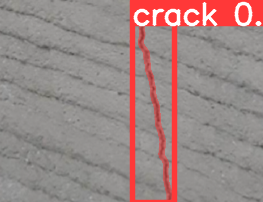

In [11]:
from IPython.display import Image, display

display(Image(filename=RESULT_IMAGE_PATH))